In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [4]:
import os
import pandas as pd

current_dir = os.getcwd()
path_file = os.path.join(current_dir, "steel_industry_data.csv")

# Ler os dados do CSV com encoding especificado
data = pd.read_csv(path_file, encoding='latin1')

FileNotFoundError: [Errno 2] No such file or directory: '/home/caio/dxzl-academy/machine-learning/steel_industry_data.csv'

In [90]:
data.head()

,ï»¿date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.0,0.0,73.21,100.0,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.0,0.0,66.77,100.0,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.0,0.0,70.28,100.0,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.0,0.0,68.09,100.0,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.0,0.0,64.72,100.0,4500,Weekday,Monday,Light_Load


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   ï»¿date                               35040 non-null  object 
 1   Usage_kWh                             35040 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35040 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35040 non-null  float64
 4   CO2(tCO2)                             35040 non-null  float64
 5   Lagging_Current_Power_Factor          35040 non-null  float64
 6   Leading_Current_Power_Factor          35040 non-null  float64
 7   NSM                                   35040 non-null  int64  
 8   WeekStatus                            35040 non-null  object 
 9   Day_of_week                           35040 non-null  object 
 10  Load_Type                             35040 non-null  object 
dtypes: float64(6), 

In [92]:
data.rename(columns = {'ï»¿date': 'Data',
                       'Usage_kWh': 'Consumo_kWh',
                       'Lagging_Current_Reactive.Power_kVarh': 'Potencia_Reativa_Atrasada_kVarh',
                       'Leading_Current_Reactive.Power_kVarh': 'Potencia_Reativa_Adiantada_kVarh',
                       ' CO2(tco2)': 'CO2(toneladas)',
                       'Lagging_Current_Power_Factor': 'Fator_Potencia_Atrasada',
                       'Leading_Current_Power_Factor': 'Fator_Potencia_Adiantada',
                       'NSM': 'Segundo_Desde_MeiaNoite',
                       'WeekStatus': 'Status_Semana',
                       'Day_of_week': 'Dia_da_Semana',
                       'Load_Type': 'Tipo_de_Carga'}, inplace=True)

In [93]:
data.isnull().sum()

Data                                    0
Consumo_kWh                             0
Potencia_Reativa_Atrasada_kVarh         0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Fator_Potencia_Atrasada                 0
Fator_Potencia_Adiantada                0
Segundo_Desde_MeiaNoite                 0
Status_Semana                           0
Dia_da_Semana                           0
Tipo_de_Carga                           0
dtype: int64

In [94]:
# Selecionar colunas usadas
data_red = data.iloc[:, 1:8]
data_red

,Consumo_kWh,Potencia_Reativa_Atrasada_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Fator_Potencia_Atrasada,Fator_Potencia_Adiantada,Segundo_Desde_MeiaNoite
0,3.17,2.95,0.00,0.0,73.21,100.00,900
1,4.00,4.46,0.00,0.0,66.77,100.00,1800
2,3.24,3.28,0.00,0.0,70.28,100.00,2700
3,3.31,3.56,0.00,0.0,68.09,100.00,3600
4,3.82,4.50,0.00,0.0,64.72,100.00,4500
...,...,...,...,...,...,...,...
35035,3.85,4.86,0.00,0.0,62.10,100.00,82800
35036,3.74,3.74,0.00,0.0,70.71,100.00,83700
35037,3.78,3.17,0.07,0.0,76.62,99.98,84600
35038,3.78,3.06,0.11,0.0,77.72,99.96,85500


<function matplotlib.pyplot.show(close=None, block=None)>

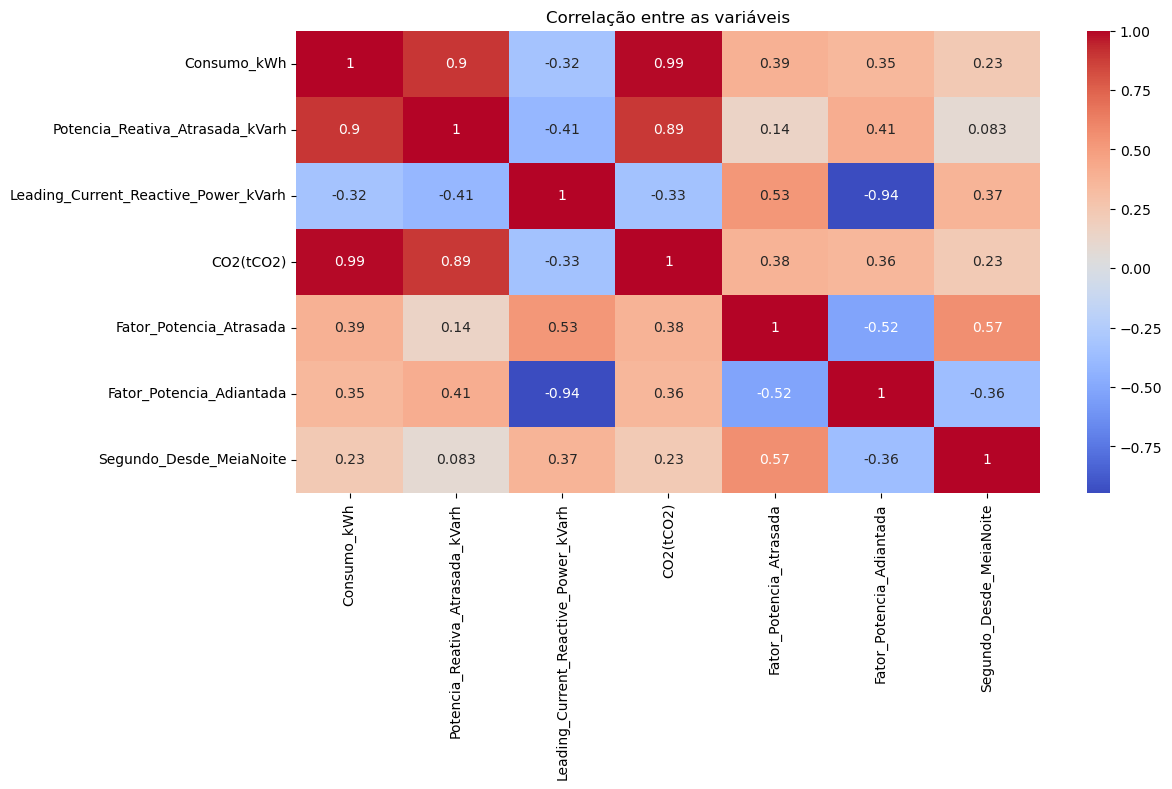

In [95]:
# Verifique as correlações das variáveis
plt.figure(figsize=(12, 6))
sns.heatmap(data_red.corr(), annot = True, cmap = 'coolwarm')
plt.title('Correlação entre as variáveis')
plt.show

In [104]:
# Separar as caractéristicas
X = data_red.drop('Consumo_kWh', axis=1)
X

,Potencia_Reativa_Atrasada_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Fator_Potencia_Atrasada,Fator_Potencia_Adiantada,Segundo_Desde_MeiaNoite
0,2.95,0.00,0.0,73.21,100.00,900
1,4.46,0.00,0.0,66.77,100.00,1800
2,3.28,0.00,0.0,70.28,100.00,2700
3,3.56,0.00,0.0,68.09,100.00,3600
4,4.50,0.00,0.0,64.72,100.00,4500
...,...,...,...,...,...,...
35035,4.86,0.00,0.0,62.10,100.00,82800
35036,3.74,0.00,0.0,70.71,100.00,83700
35037,3.17,0.07,0.0,76.62,99.98,84600
35038,3.06,0.11,0.0,77.72,99.96,85500


In [97]:
# Separando os rótulos
y = data_red['Consumo_kWh']

0        3.17
1        4.00
2        3.24
3        3.31
4        3.82
         ... 
35035    3.85
35036    3.74
35037    3.78
35038    3.78
35039    3.67
Name: Consumo_kWh, Length: 35040, dtype: float64

In [105]:
# Divisão treino e teste com 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [99]:
# Transformando valores y em valores binários a partir da mediana
threshold = y.median()
y_train_bin = np.where(y_train > threshold, 1, 0)

In [100]:
# Treino do modelo em regressão logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train_bin)

LogisticRegression(max_iter=1000)

In [101]:
# A partir do modelo treinado, previsões no conjunto de teste
y_pred = log_model.predict(X_test)

In [102]:
# Cálculo da acurácia no conjunto de teste
y_test_bin = np.where(y_test > threshold, 1, 0)
accuracy = accuracy_score(y_test_bin, y_pred)
print('Acurácia (Regressão Logística):', accuracy)

Acurácia (Regressão Logística): 0.9550513698630136


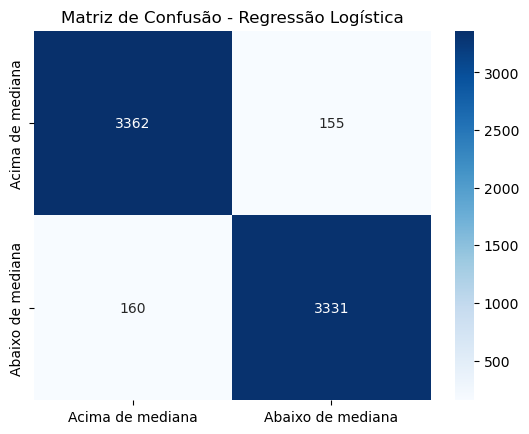

In [103]:
# Criar e mostrar a matriz de confusão
cm = confusion_matrix(y_test_bin, y_pred)
class_labels = ['Acima de mediana', 'Abaixo de mediana']
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Matriz de Confusão - Regressão Logística')
plt.show()